### 1 Import Libraries and Data

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os

# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/lokalokes/deepTCR/main/1_DatasetCharacteristics/pivoted_cdr3_subset_34_patients.tsv", delimiter='\t')

df.head()  # Print first few rows to verify

,patient_id_Emerson,length,IMGT,AA,n,total_per_length_position,relativ_freq,sum_freq
0,1,12,P105,C,1,152,0.006579,1
1,1,12,P105,F,3,152,0.019737,1
2,1,12,P105,G,9,152,0.059211,1
3,1,12,P105,P,1,152,0.006579,1
4,1,12,P105,R,3,152,0.019737,1


### 2 Analyze Data

In [7]:
# Inspect the first few rows of the DataFrame
print(df.head())

# Check for any NaN or invalid entries in 'patient_id_Emerson'
print(df['patient_id_Emerson'].isnull().sum())
print(df['patient_id_Emerson'].unique())


   patient_id_Emerson  length  IMGT AA  n  total_per_length_position  \
0                   1      12  P105  C  1                        152   
1                   1      12  P105  F  3                        152   
2                   1      12  P105  G  9                        152   
3                   1      12  P105  P  1                        152   
4                   1      12  P105  R  3                        152   

   relativ_freq  sum_freq  
0      0.006579         1  
1      0.019737         1  
2      0.059211         1  
3      0.006579         1  
4      0.019737         1  
0
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34]


#### 2.1 Analyze Data - Just have a look at each patient (out of 34) for length 15

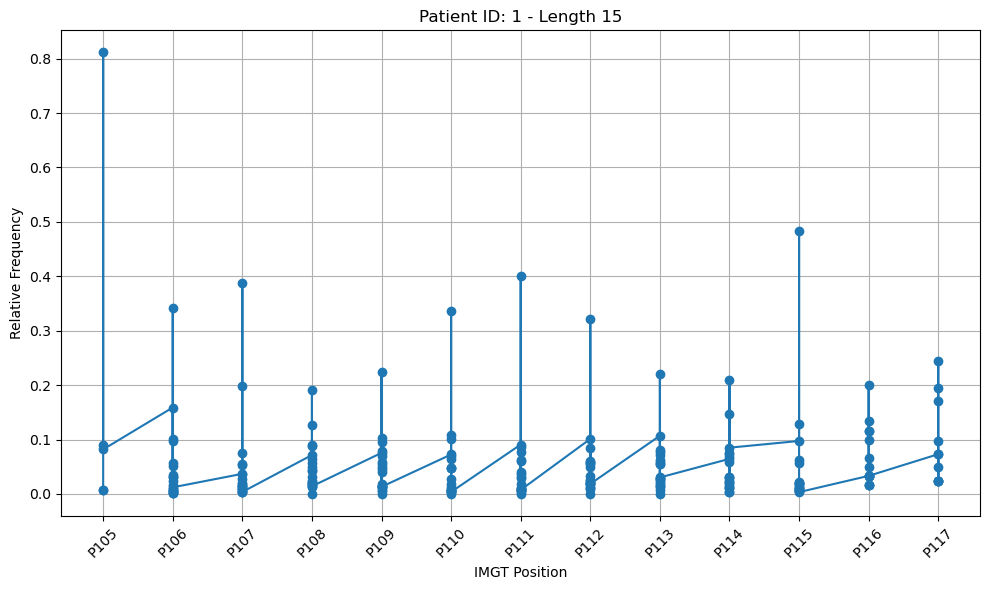

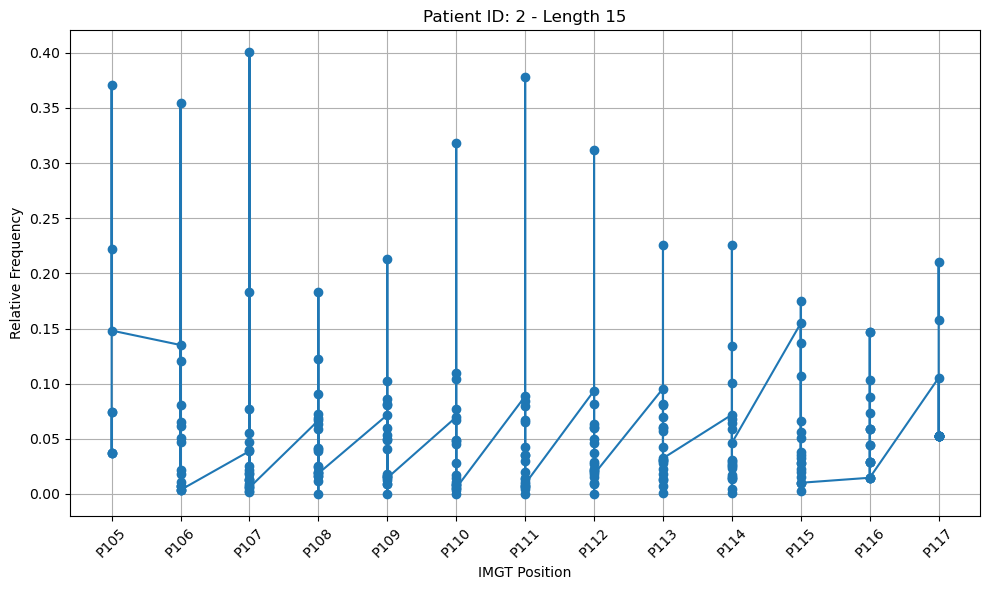

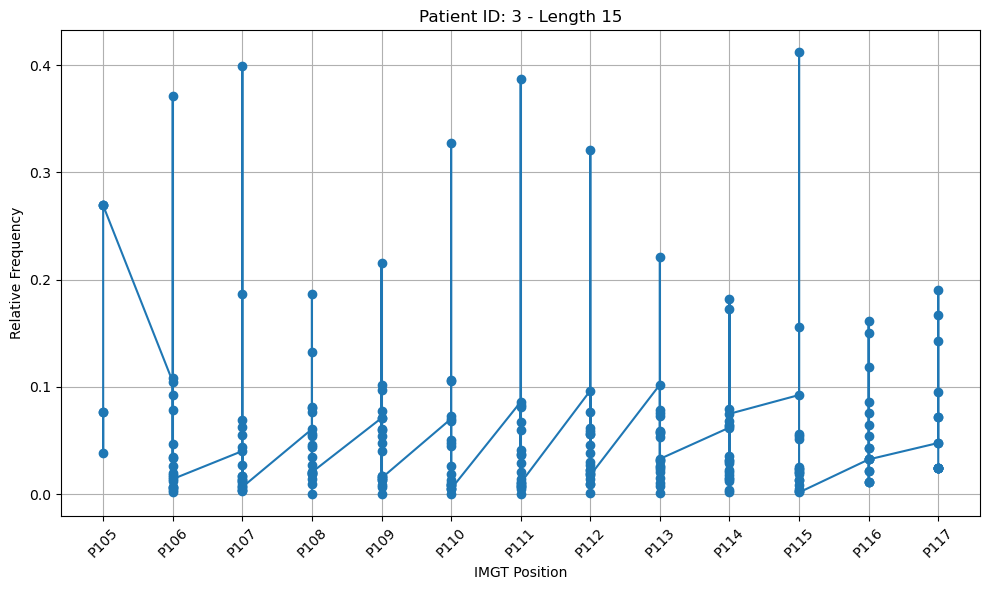

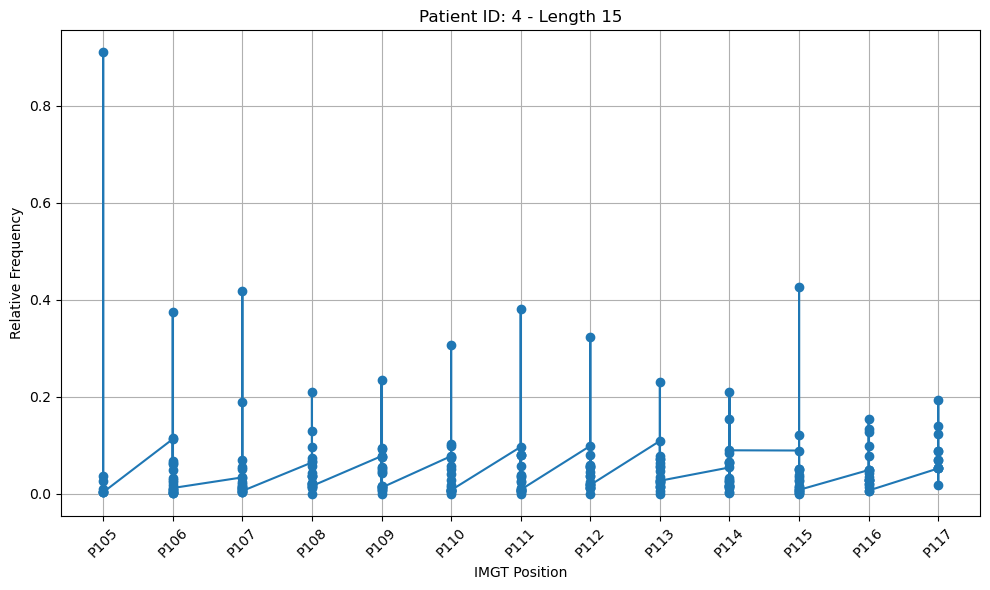

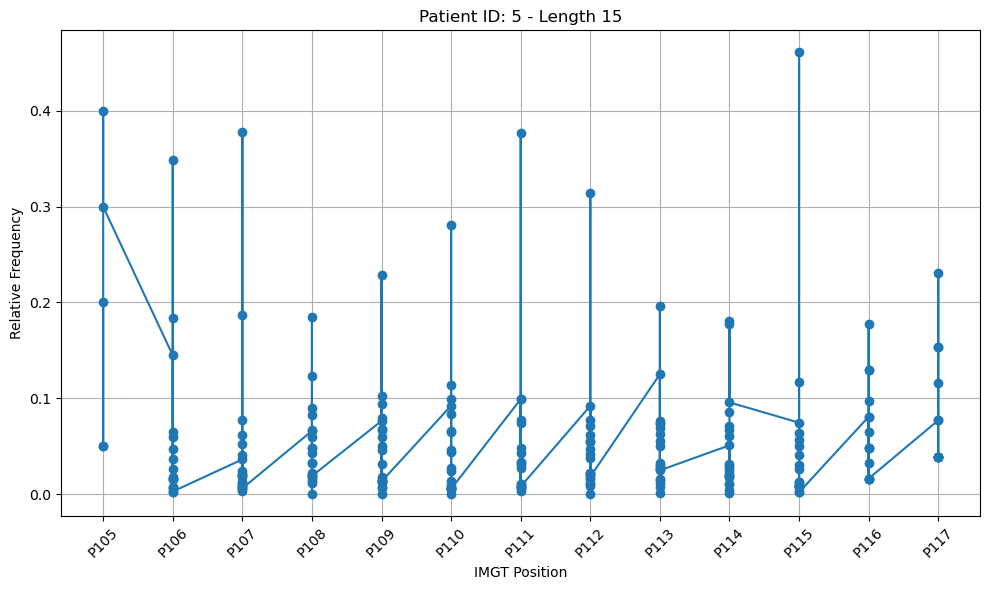

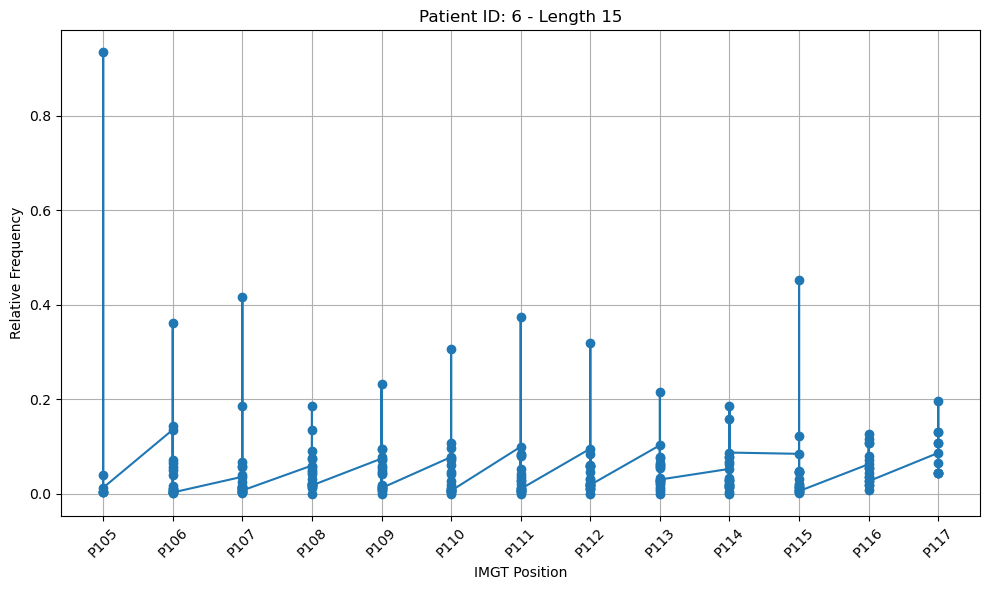

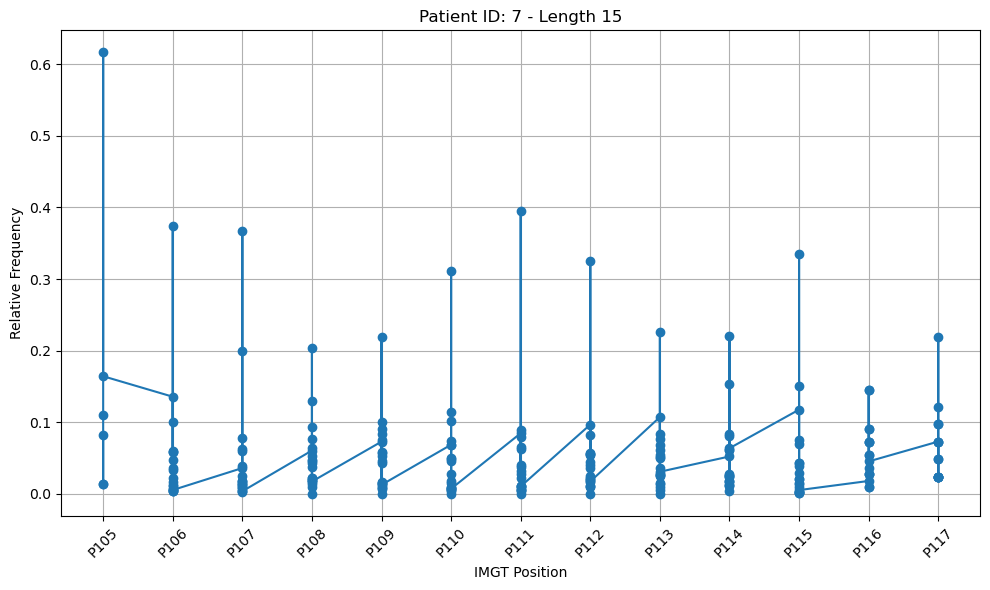

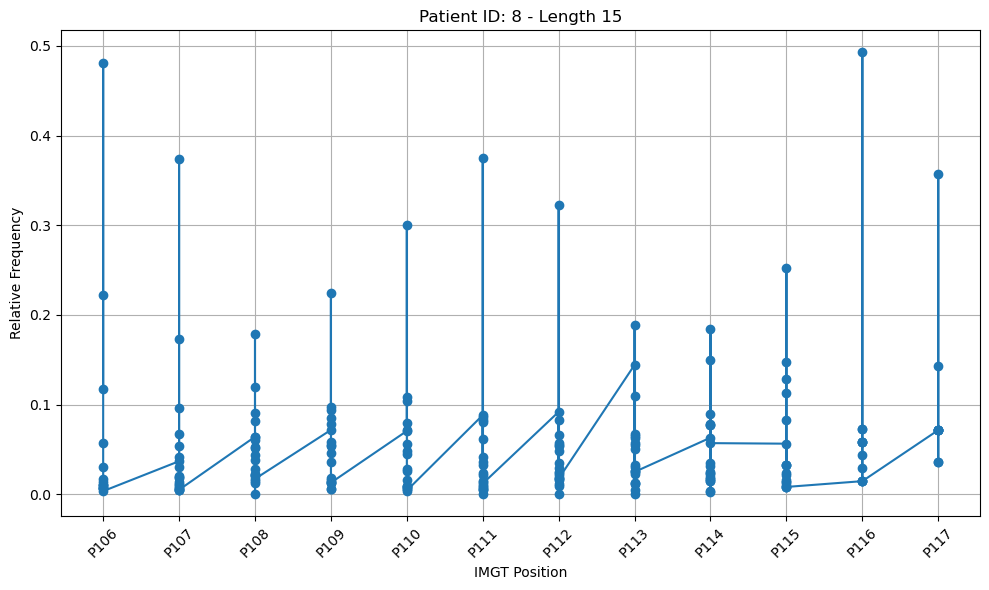

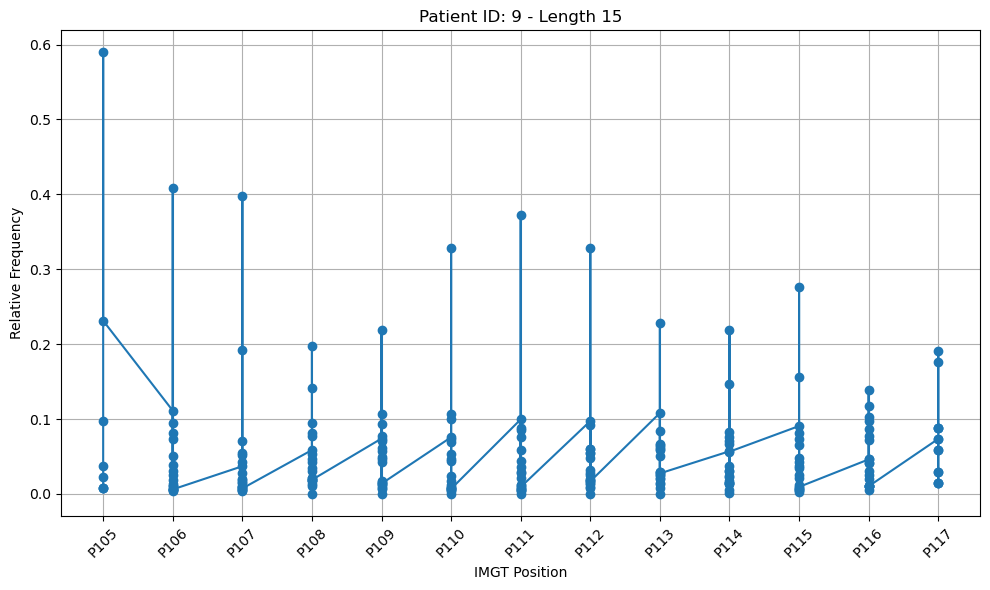

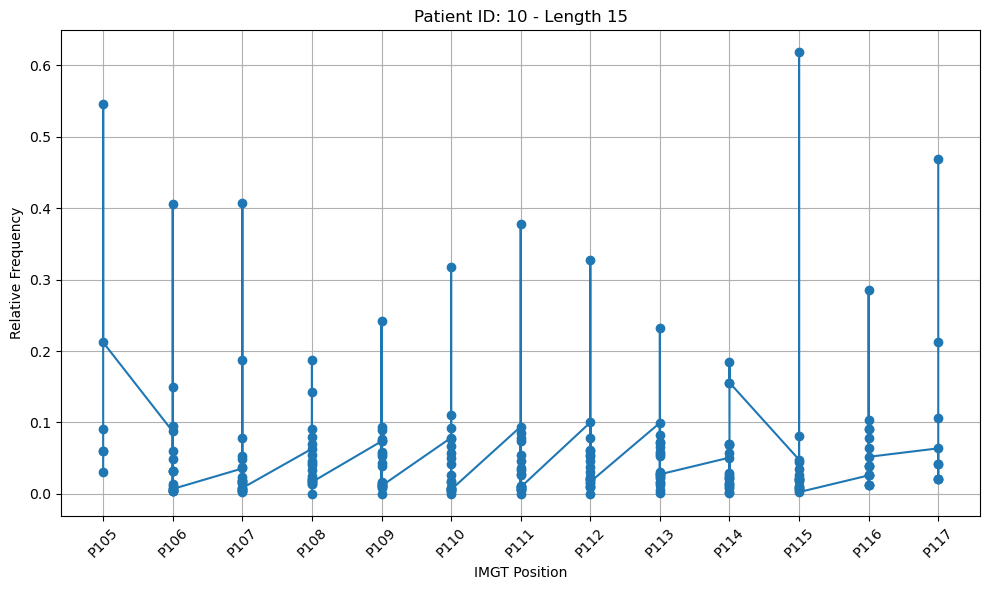

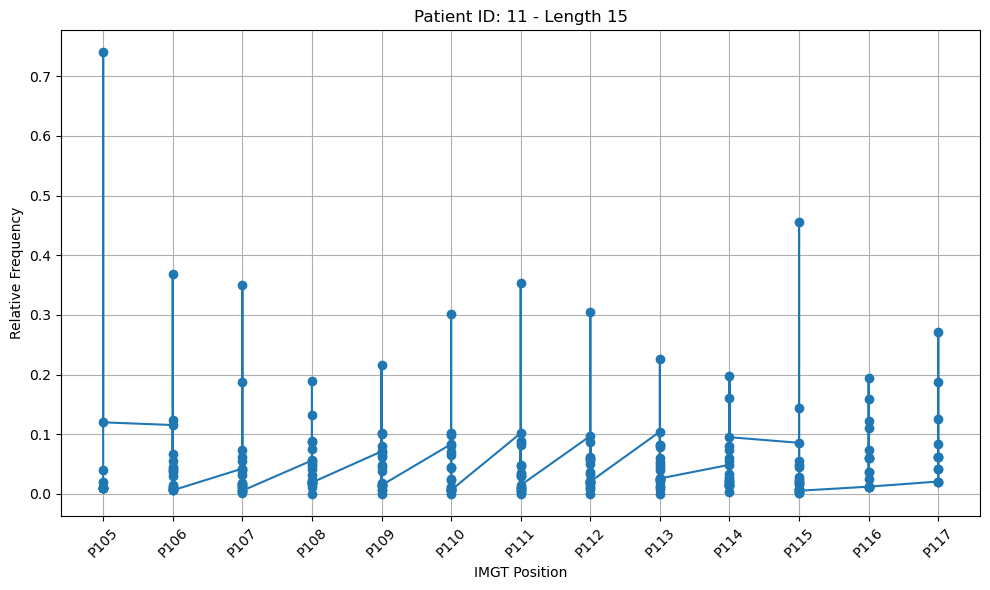

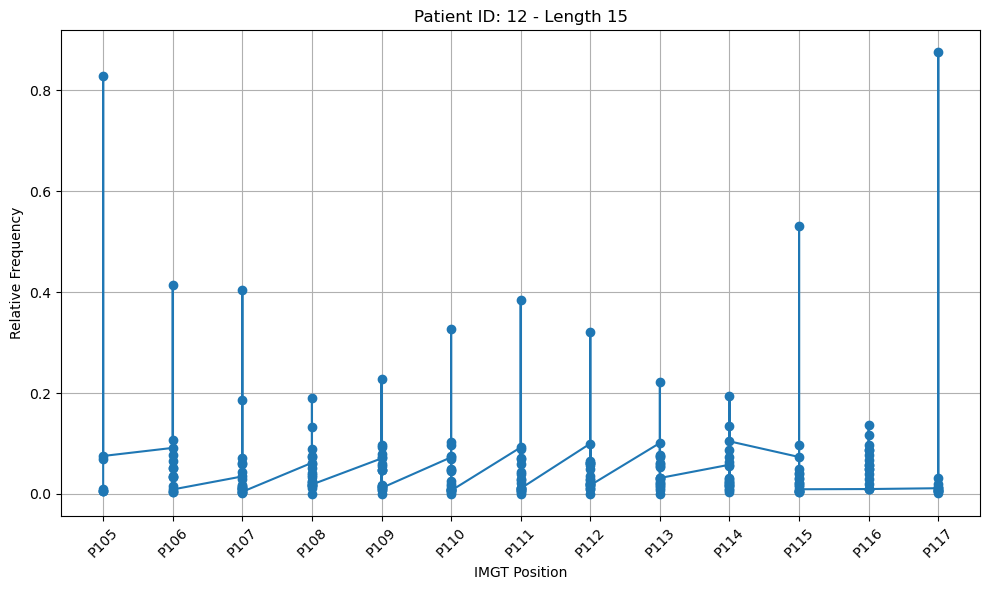

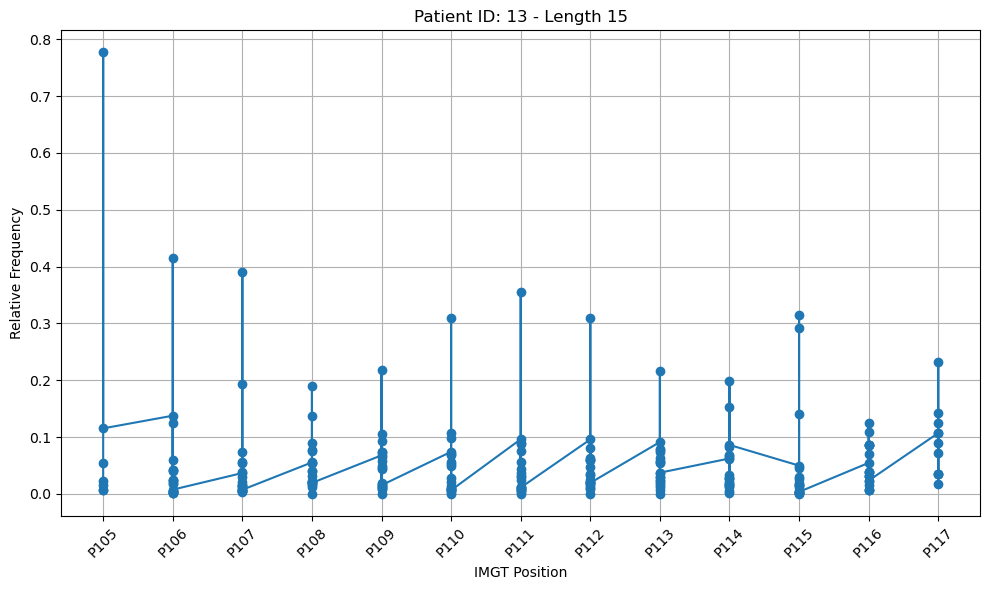

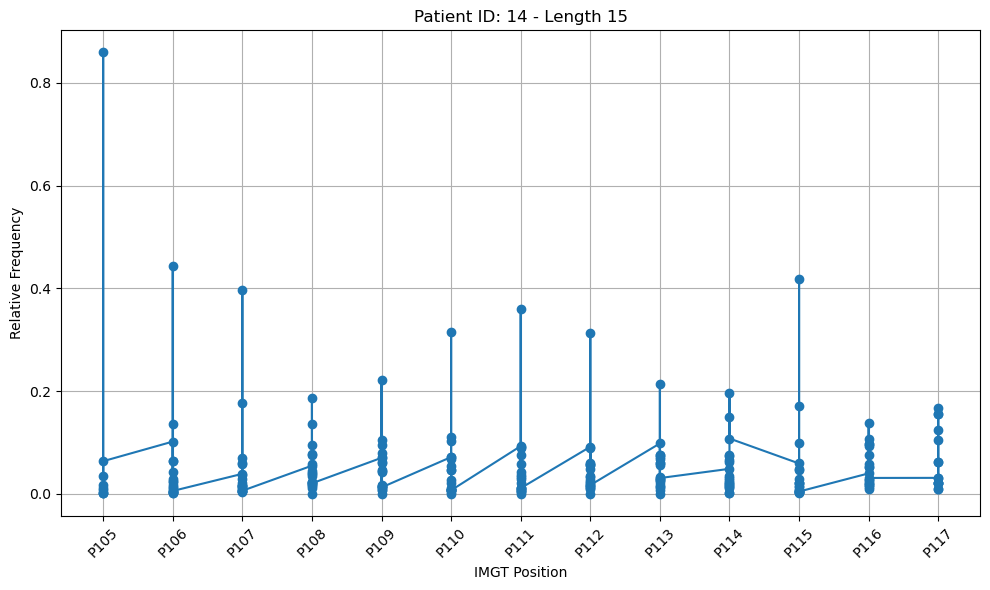

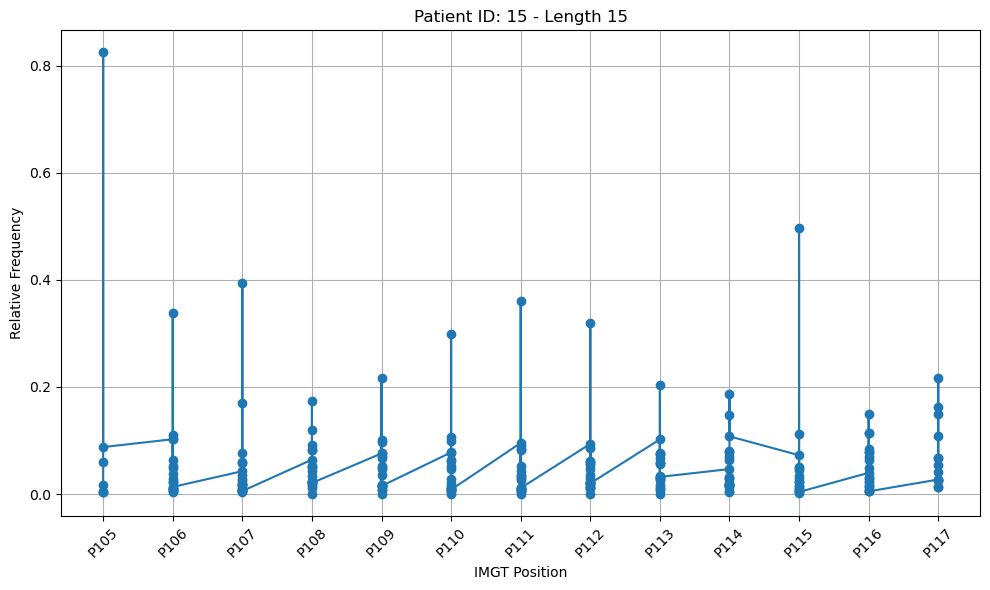

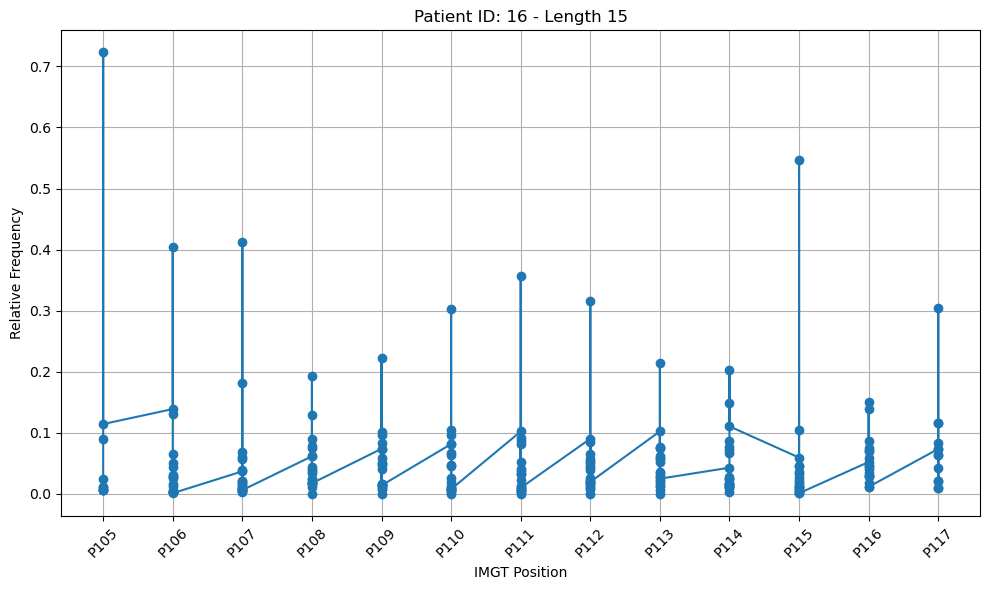

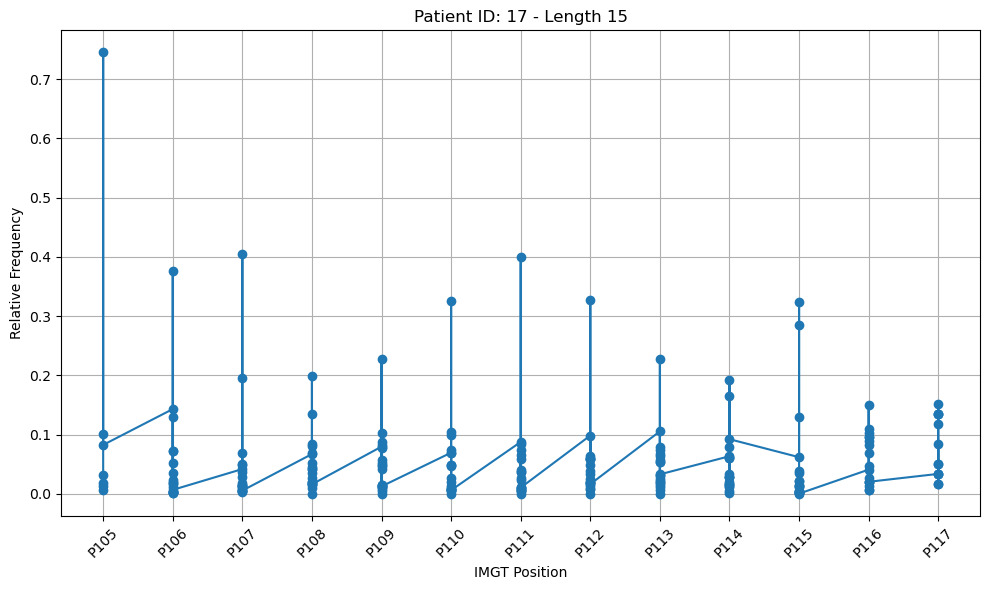

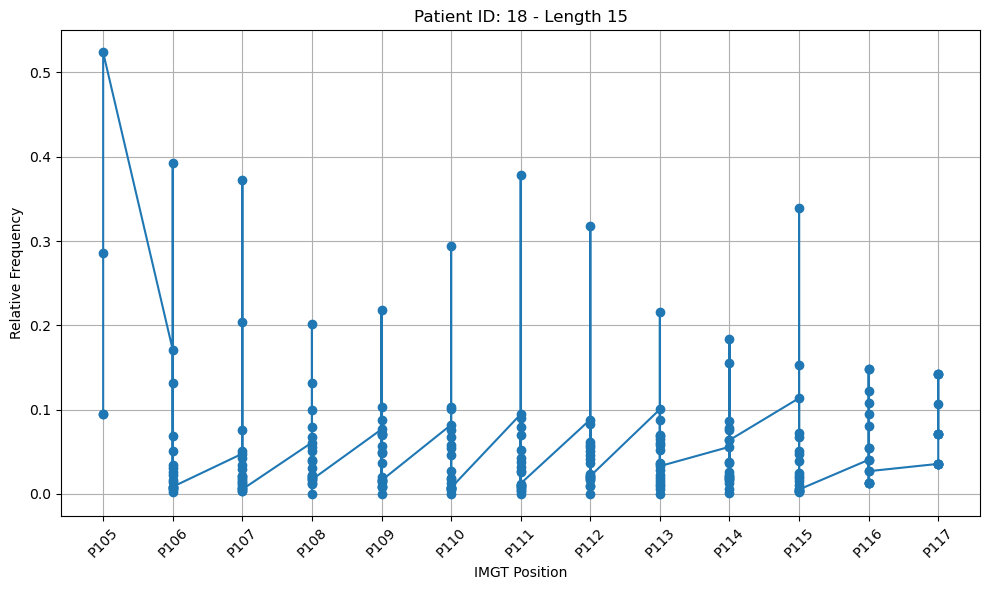

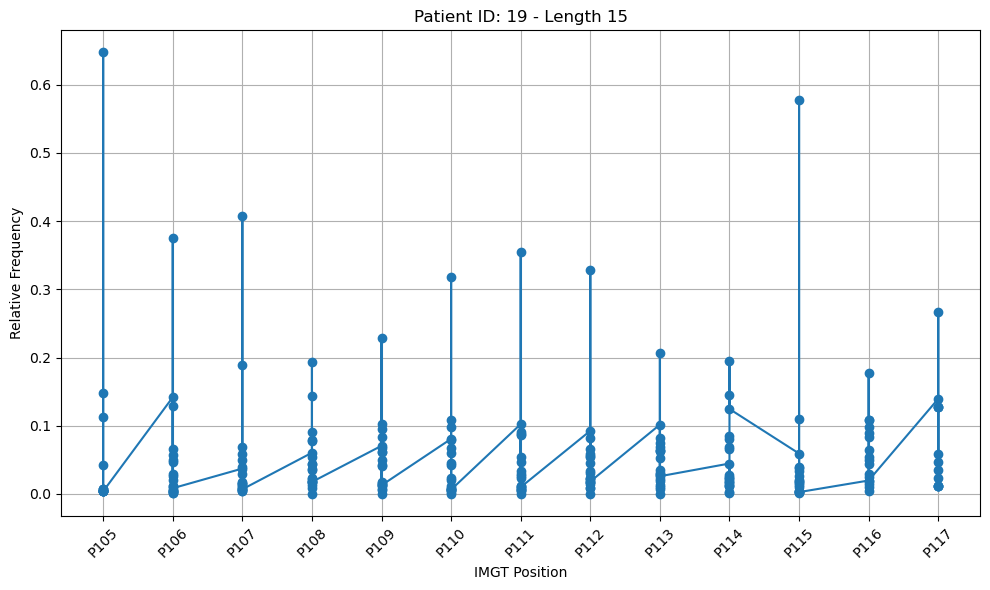

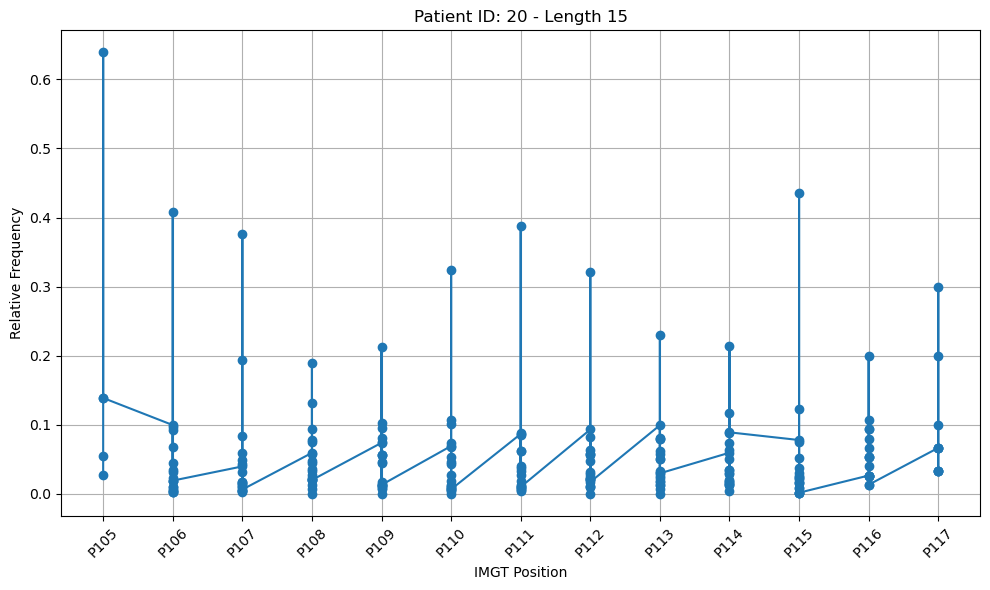

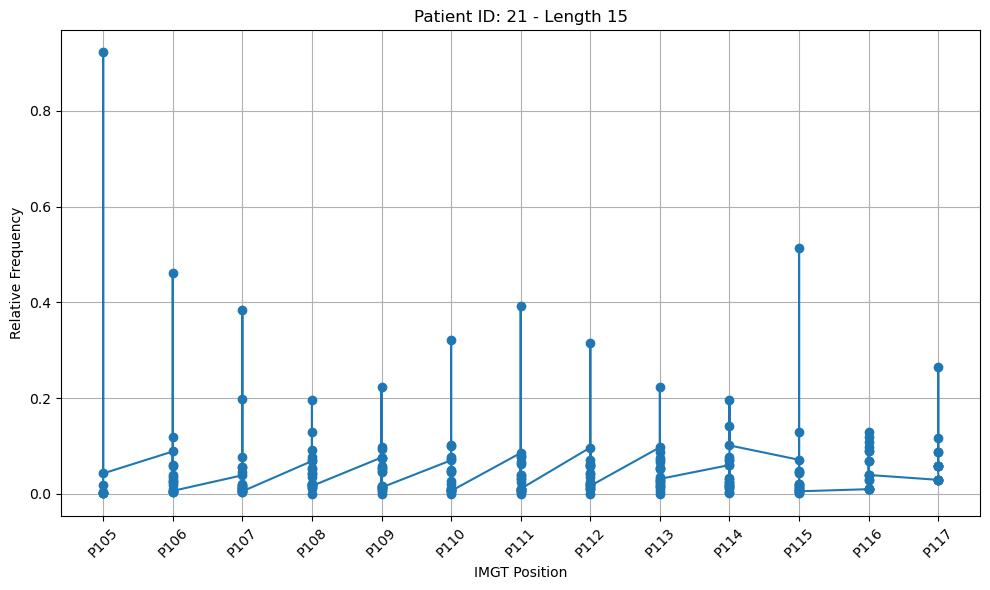

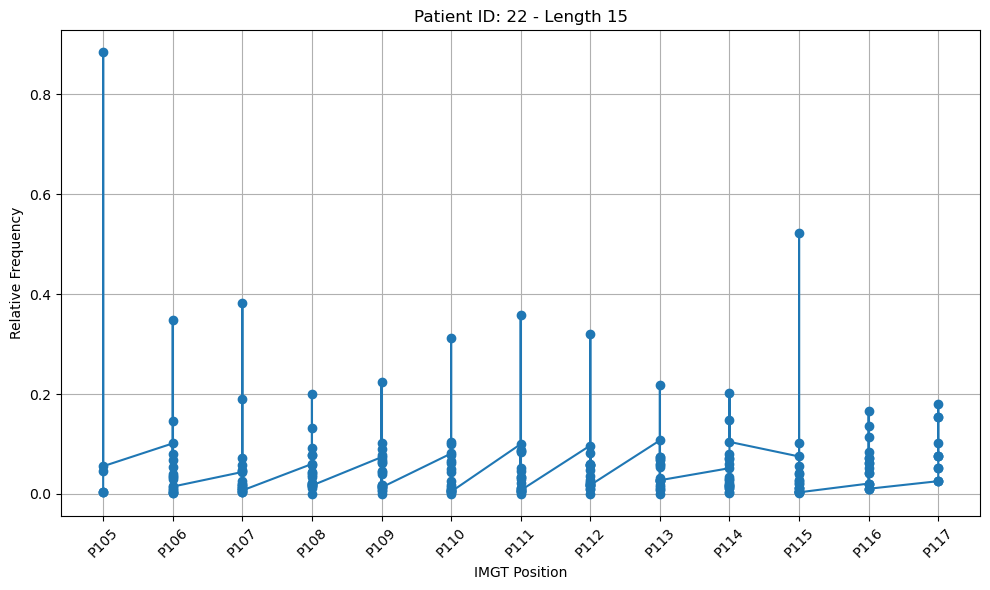

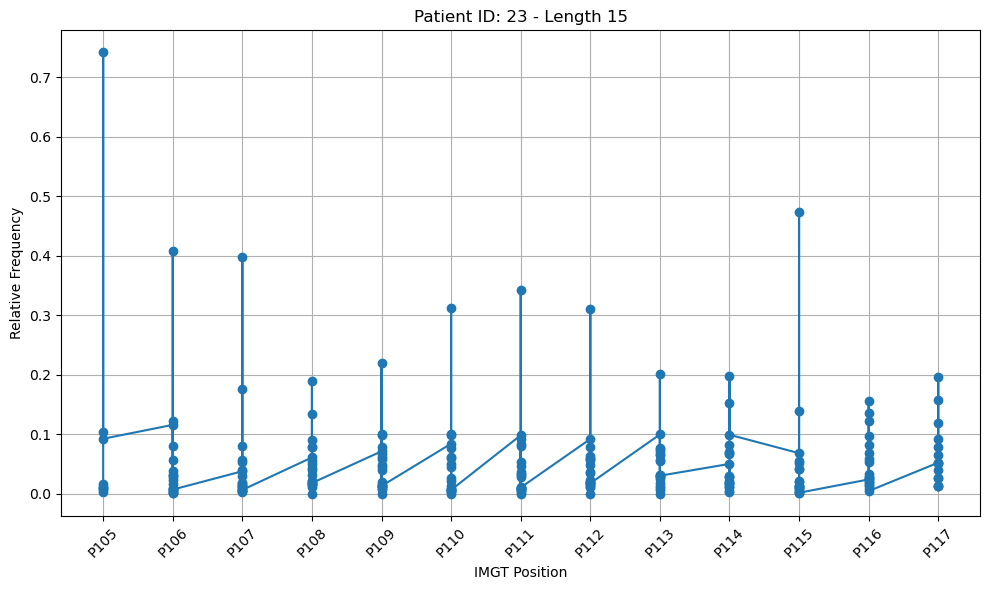

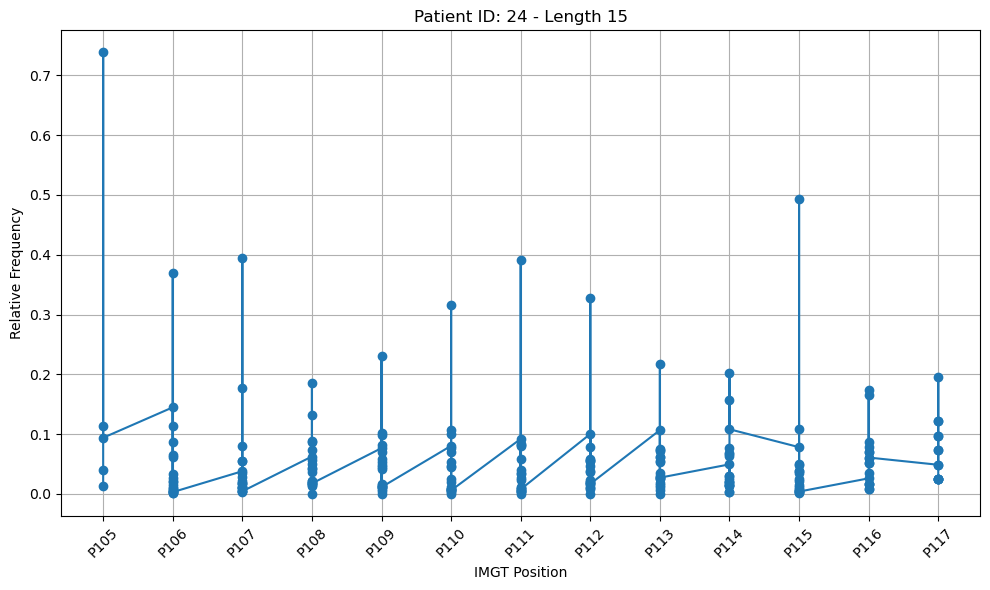

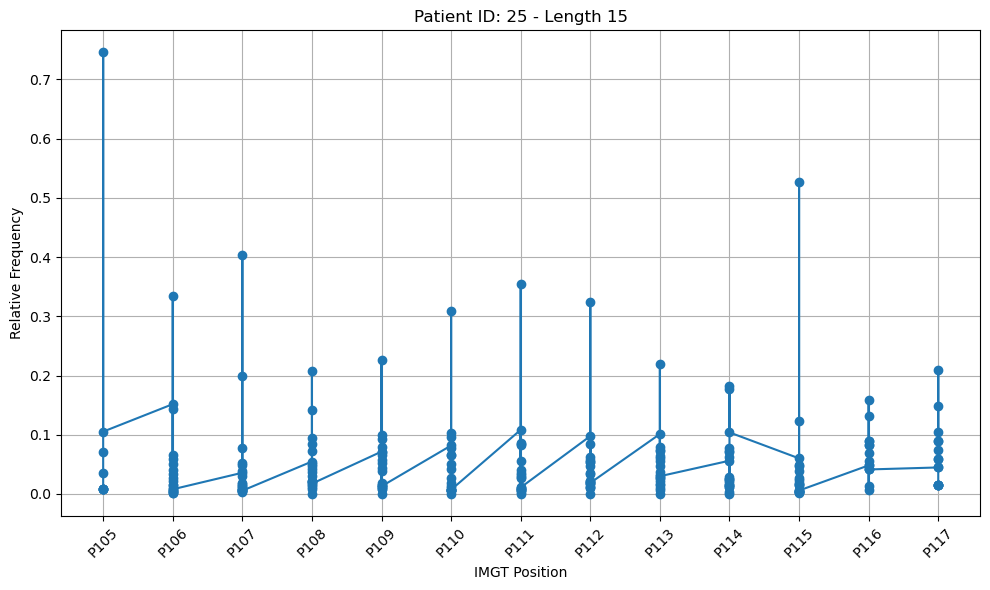

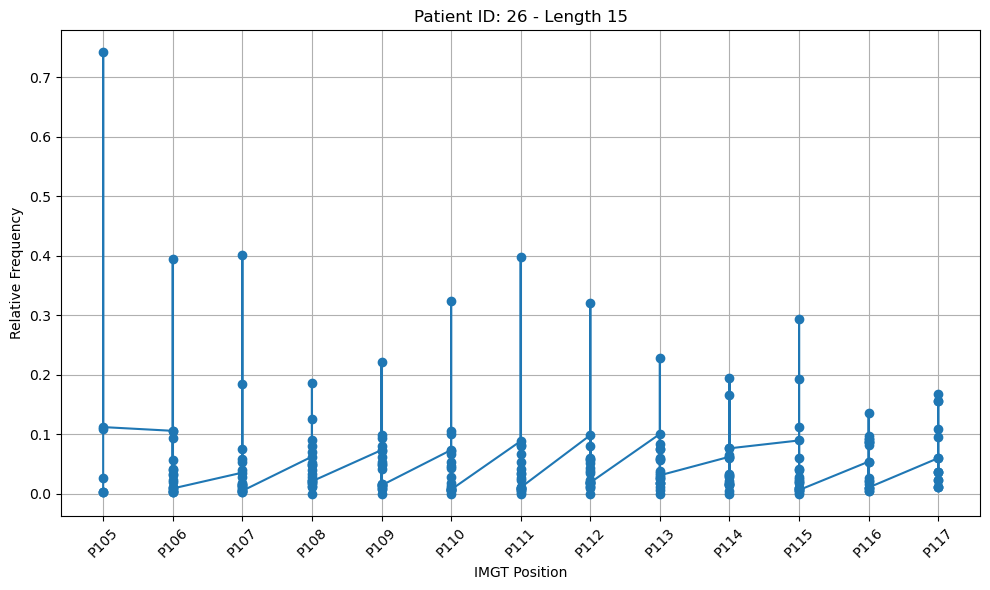

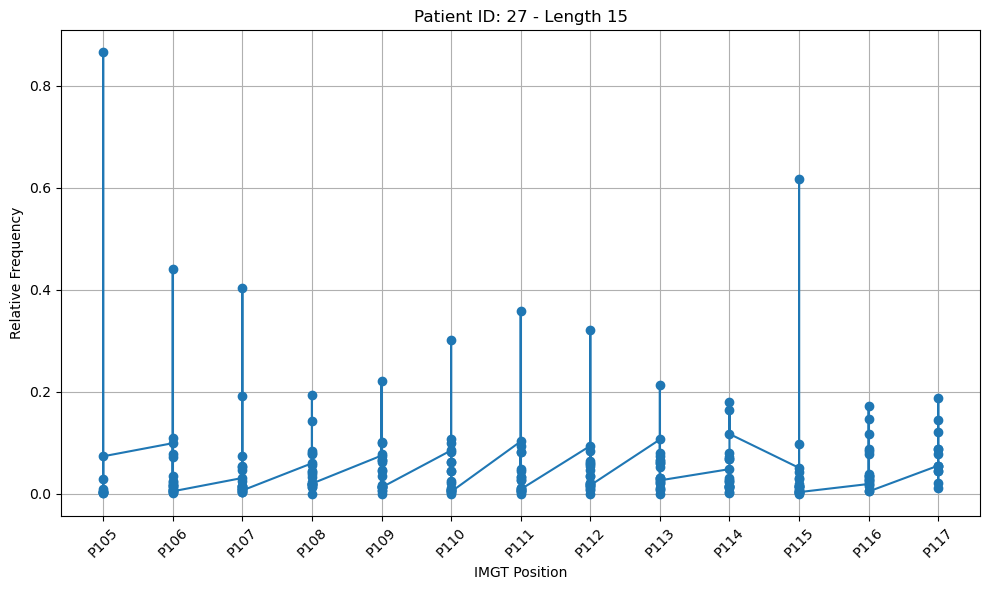

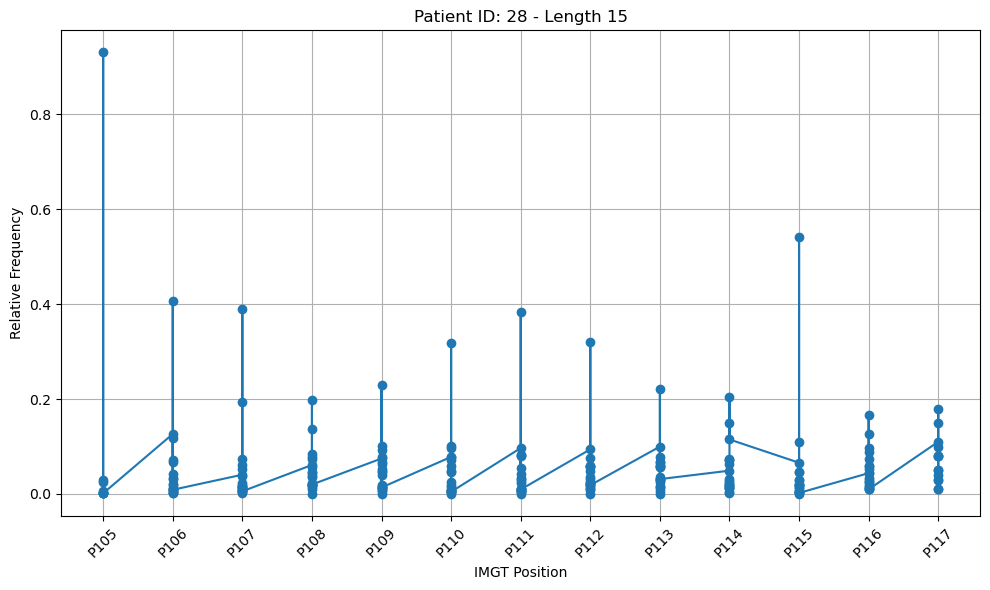

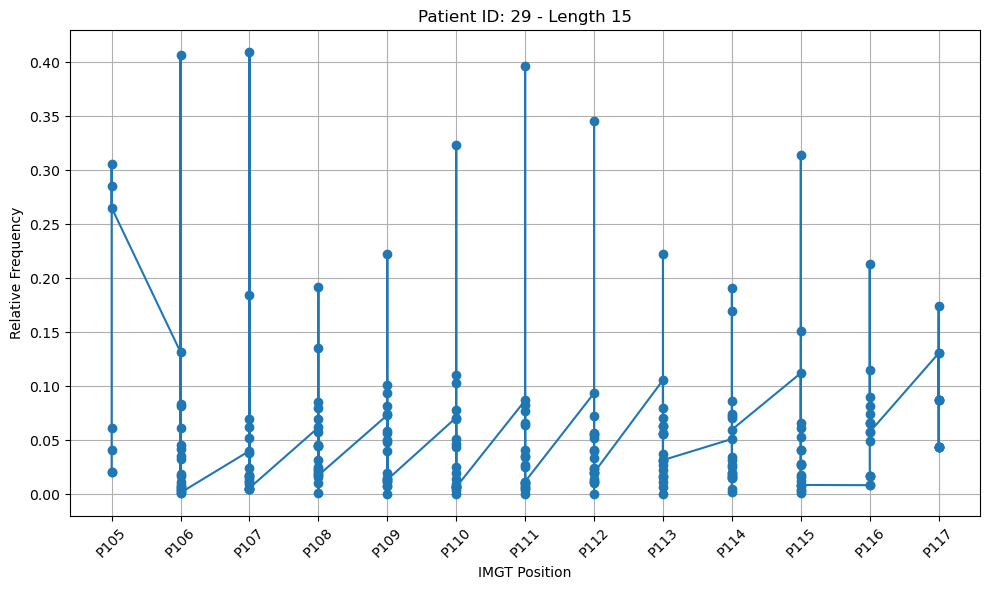

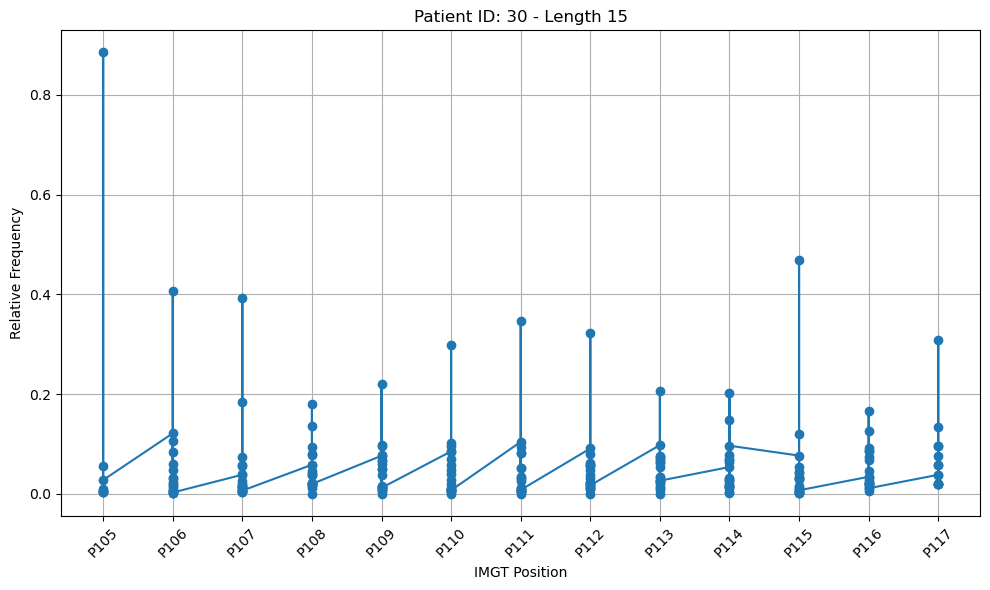

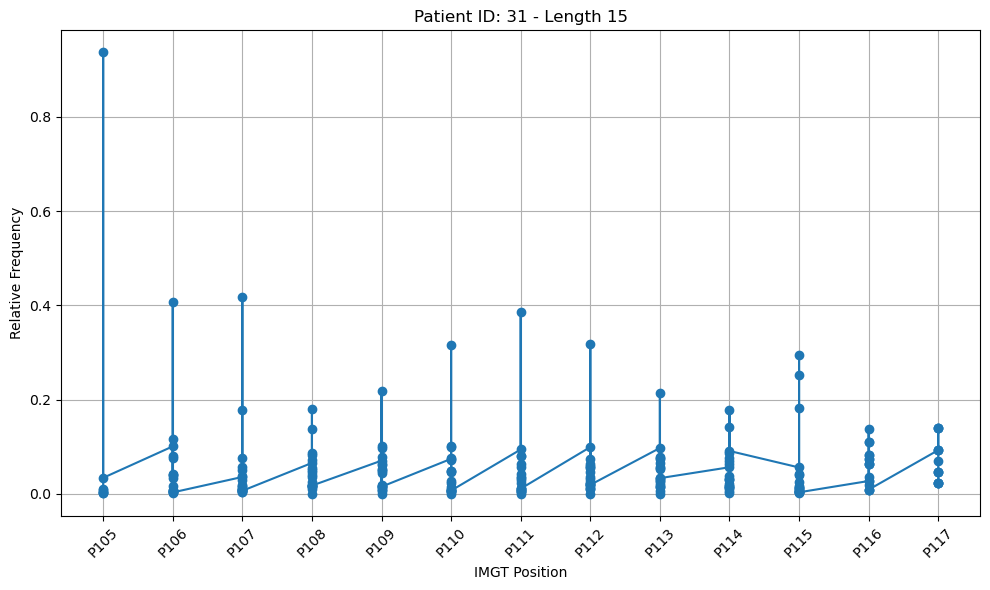

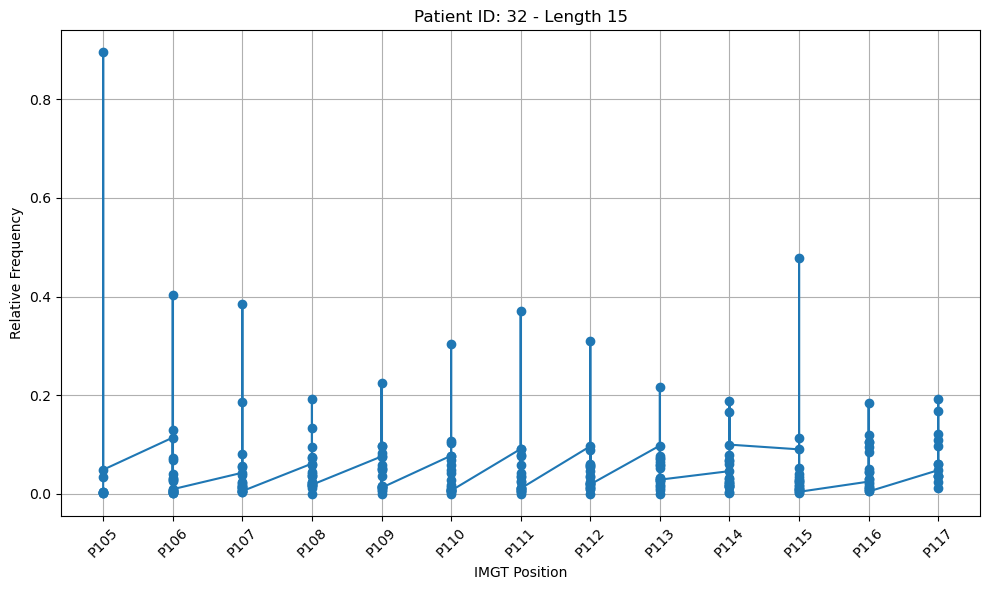

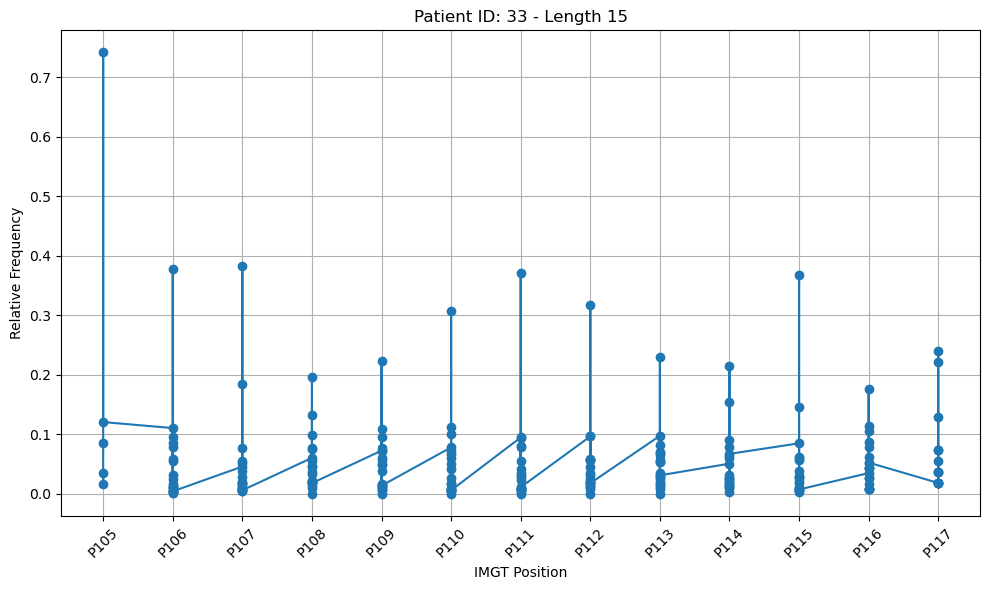

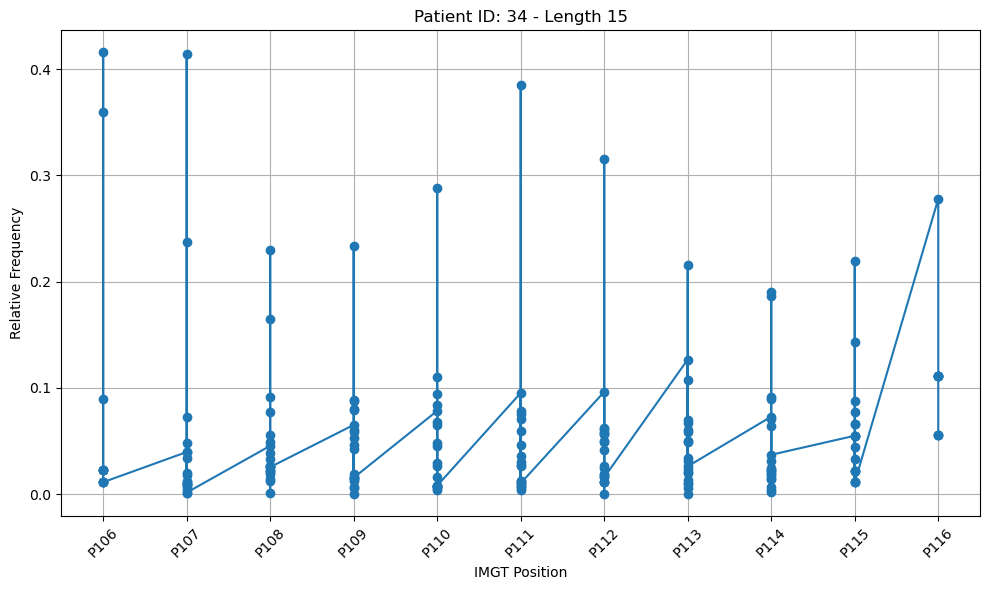

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the dataset
url = "https://raw.githubusercontent.com/lokalokes/deepTCR/main/1_DatasetCharacteristics/pivoted_cdr3_subset_34_patients.tsv"
df = pd.read_csv(url, delimiter='\t')

# Filter the dataset for length == 15
df_filtered = df[df['length'] == 15]

# Get unique patient IDs
unique_patients = df_filtered['patient_id_Emerson'].unique()

# Plot data for each patient
for patient in unique_patients:
    patient_data = df_filtered[df_filtered['patient_id_Emerson'] == patient]
    
    plt.figure(figsize=(10, 6))
    plt.plot(patient_data['IMGT'], patient_data['relativ_freq'], marker='o', linestyle='-')
    plt.title(f'Patient ID: {patient} - Length 15')
    plt.xlabel('IMGT Position')
    plt.ylabel('Relative Frequency')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#### 2.2 Analyze Data - Group by length/IMGT/AA and cumulative relative frequency (sum over 'n' divided by sum over 'total_per_length_position') for each length 12-18

   length  IMGT AA   n
0      12  P105  A  24
1      12  P105  C  26
2      12  P105  D  32
3      12  P105  E  31
4      12  P105  F  39


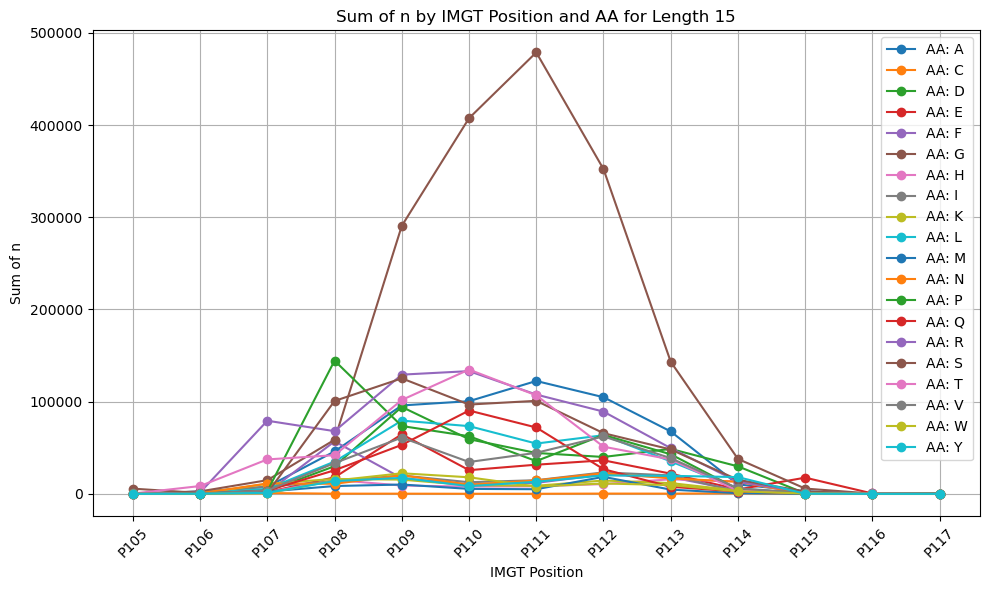

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/lokalokes/deepTCR/main/1_DatasetCharacteristics/pivoted_cdr3_subset_34_patients.tsv"
df = pd.read_csv(url, delimiter='\t')

# Group by length, IMGT, and AA, then sum the 'n' column
grouped_df = df.groupby(['length', 'IMGT', 'AA'])['n'].sum().reset_index()

# Print the grouped DataFrame
print(grouped_df.head())

# Filter for length 15 for plotting
length_15_df = grouped_df[grouped_df['length'] == 15]

# Plot the cumulative data
plt.figure(figsize=(10, 6))
for aa in length_15_df['AA'].unique():
    aa_data = length_15_df[length_15_df['AA'] == aa]
    plt.plot(aa_data['IMGT'], aa_data['n'], marker='o', linestyle='-', label=f'AA: {aa}')

plt.title('Sum of n by IMGT Position and AA for Length 15')
plt.xlabel('IMGT Position')
plt.ylabel('Sum of n')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


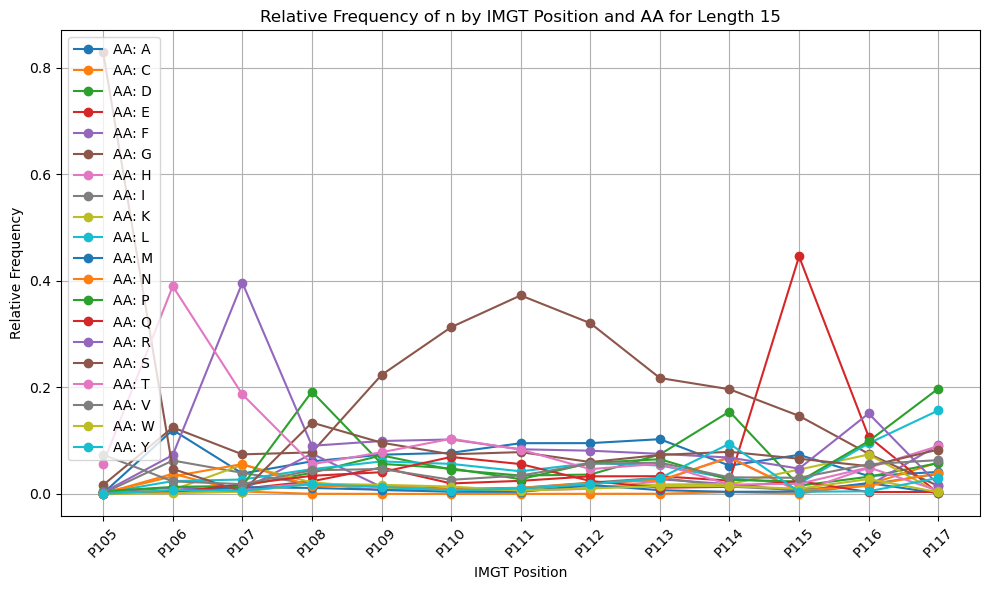

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/lokalokes/deepTCR/main/1_DatasetCharacteristics/pivoted_cdr3_subset_34_patients.tsv"
df = pd.read_csv(url, delimiter='\t')

# Group by length, IMGT, and AA, then sum the 'n' column
grouped_df = df.groupby(['length', 'IMGT', 'AA'])['n'].sum().reset_index()

# Filter for length 15 for plotting
length_15_df = grouped_df[grouped_df['length'] == 15]

# Calculate the total sum of 'n' for each IMGT position
total_sum_df = length_15_df.groupby('IMGT')['n'].sum().reset_index()
total_sum_df.rename(columns={'n': 'total_n'}, inplace=True)

# Merge the total sum DataFrame with the length_15_df
merged_df = pd.merge(length_15_df, total_sum_df, on='IMGT')

# Calculate the relative frequency
merged_df['relative_freq'] = merged_df['n'] / merged_df['total_n']

# Plot the relative frequency data
plt.figure(figsize=(10, 6))
for aa in merged_df['AA'].unique():
    aa_data = merged_df[merged_df['AA'] == aa]
    plt.plot(aa_data['IMGT'], aa_data['relative_freq'], marker='o', linestyle='-', label=f'AA: {aa}')

plt.title('Relative Frequency of n by IMGT Position and AA for Length 15')
plt.xlabel('IMGT Position')
plt.ylabel('Relative Frequency')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The following code does the following:

Filters the dataset for entries where the length is 15.
Groups the filtered data by IMGT position and amino acid (AA), summing the columns 'n' and 'total_per_length_position'.
Calculates the relative frequency by dividing 'n' by 'total_per_length_position'.
Sorts the DataFrame by IMGT position to ensure the cumulative sum is calculated correctly.
Calculates the cumulative relative frequency for each amino acid (AA) by using the cumulative sum of the relative frequencies.
Plots the cumulative relative frequency data for each unique amino acid.
This should provide you with a plot of the cumulative relative frequency by IMGT position for each amino acid.

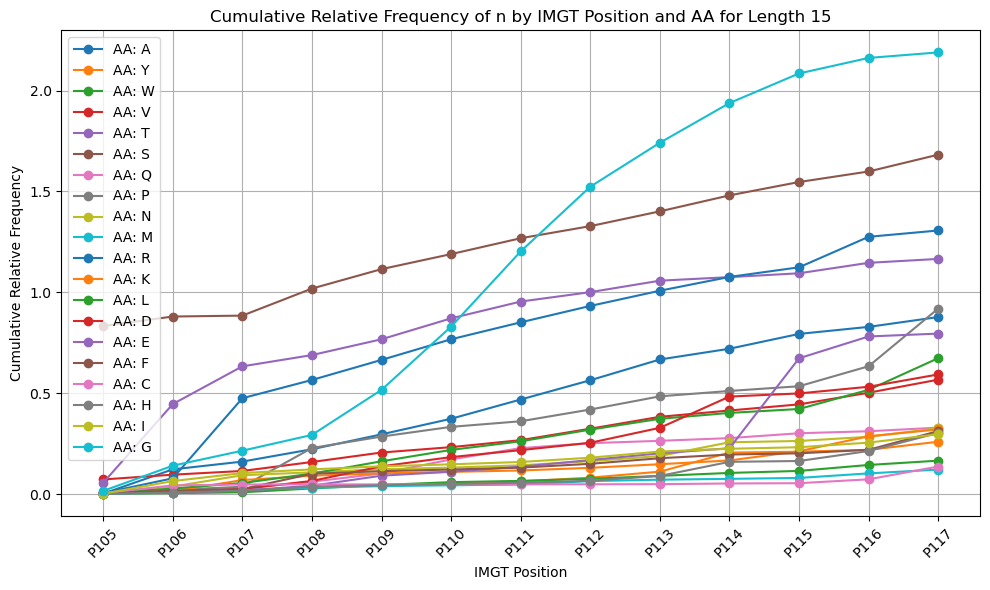

In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/lokalokes/deepTCR/main/1_DatasetCharacteristics/pivoted_cdr3_subset_34_patients.tsv"
df = pd.read_csv(url, delimiter='\t')

# Filter for length 15 for plotting
length_15_df = df[df['length'] == 15]

# Group by IMGT and AA, then sum the 'n' and 'total_per_length_position' columns
grouped_df = length_15_df.groupby(['IMGT', 'AA'])[['n', 'total_per_length_position']].sum().reset_index()

# Calculate the relative frequency
grouped_df['relative_freq'] = grouped_df['n'] / grouped_df['total_per_length_position']

# Sort by IMGT position to ensure cumulative sum is calculated correctly
grouped_df = grouped_df.sort_values(by=['IMGT'])

# Calculate the cumulative relative frequency for each amino acid
grouped_df['cumulative_relative_freq'] = grouped_df.groupby('AA')['relative_freq'].cumsum()

# Plot the cumulative relative frequency data
plt.figure(figsize=(10, 6))
for aa in grouped_df['AA'].unique():
    aa_data = grouped_df[grouped_df['AA'] == aa]
    plt.plot(aa_data['IMGT'], aa_data['cumulative_relative_freq'], marker='o', linestyle='-', label=f'AA: {aa}')

plt.title('Cumulative Relative Frequency of n by IMGT Position and AA for Length 15')
plt.xlabel('IMGT Position')
plt.ylabel('Cumulative Relative Frequency')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


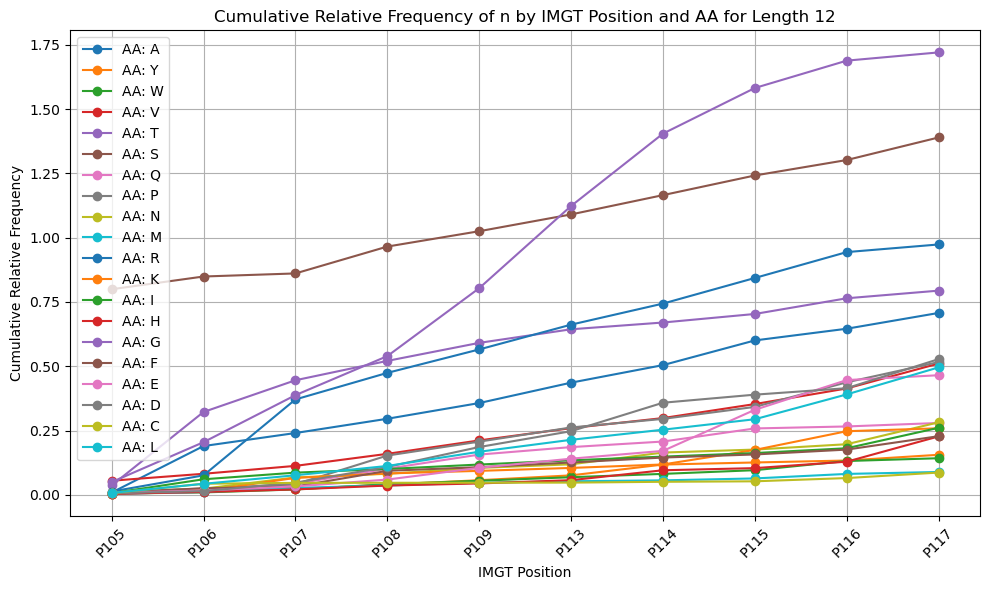

In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/lokalokes/deepTCR/main/1_DatasetCharacteristics/pivoted_cdr3_subset_34_patients.tsv"
df = pd.read_csv(url, delimiter='\t')

# Filter for length 15 for plotting
length_15_df = df[df['length'] == 12]

# Group by IMGT and AA, then sum the 'n' and 'total_per_length_position' columns
grouped_df = length_15_df.groupby(['IMGT', 'AA'])[['n', 'total_per_length_position']].sum().reset_index()

# Calculate the relative frequency
grouped_df['relative_freq'] = grouped_df['n'] / grouped_df['total_per_length_position']

# Sort by IMGT position to ensure cumulative sum is calculated correctly
grouped_df = grouped_df.sort_values(by=['IMGT'])

# Calculate the cumulative relative frequency for each amino acid
grouped_df['cumulative_relative_freq'] = grouped_df.groupby('AA')['relative_freq'].cumsum()

# Plot the cumulative relative frequency data
plt.figure(figsize=(10, 6))
for aa in grouped_df['AA'].unique():
    aa_data = grouped_df[grouped_df['AA'] == aa]
    plt.plot(aa_data['IMGT'], aa_data['cumulative_relative_freq'], marker='o', linestyle='-', label=f'AA: {aa}')

plt.title('Cumulative Relative Frequency of n by IMGT Position and AA for Length 12')
plt.xlabel('IMGT Position')
plt.ylabel('Cumulative Relative Frequency')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


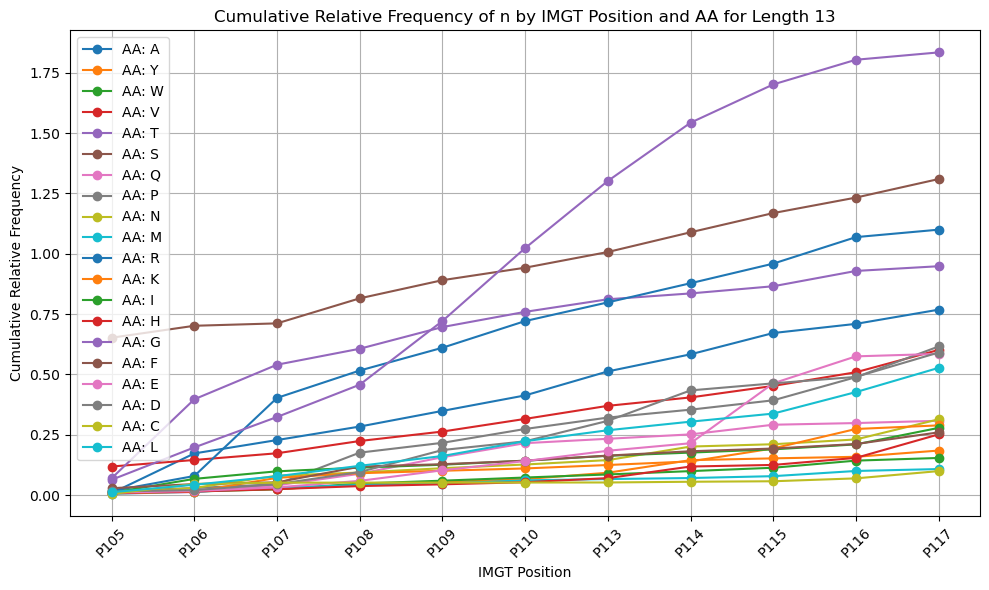

In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/lokalokes/deepTCR/main/1_DatasetCharacteristics/pivoted_cdr3_subset_34_patients.tsv"
df = pd.read_csv(url, delimiter='\t')

# Filter for length 15 for plotting
length_15_df = df[df['length'] == 13]

# Group by IMGT and AA, then sum the 'n' and 'total_per_length_position' columns
grouped_df = length_15_df.groupby(['IMGT', 'AA'])[['n', 'total_per_length_position']].sum().reset_index()

# Calculate the relative frequency
grouped_df['relative_freq'] = grouped_df['n'] / grouped_df['total_per_length_position']

# Sort by IMGT position to ensure cumulative sum is calculated correctly
grouped_df = grouped_df.sort_values(by=['IMGT'])

# Calculate the cumulative relative frequency for each amino acid
grouped_df['cumulative_relative_freq'] = grouped_df.groupby('AA')['relative_freq'].cumsum()

# Plot the cumulative relative frequency data
plt.figure(figsize=(10, 6))
for aa in grouped_df['AA'].unique():
    aa_data = grouped_df[grouped_df['AA'] == aa]
    plt.plot(aa_data['IMGT'], aa_data['cumulative_relative_freq'], marker='o', linestyle='-', label=f'AA: {aa}')

plt.title('Cumulative Relative Frequency of n by IMGT Position and AA for Length 13')
plt.xlabel('IMGT Position')
plt.ylabel('Cumulative Relative Frequency')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

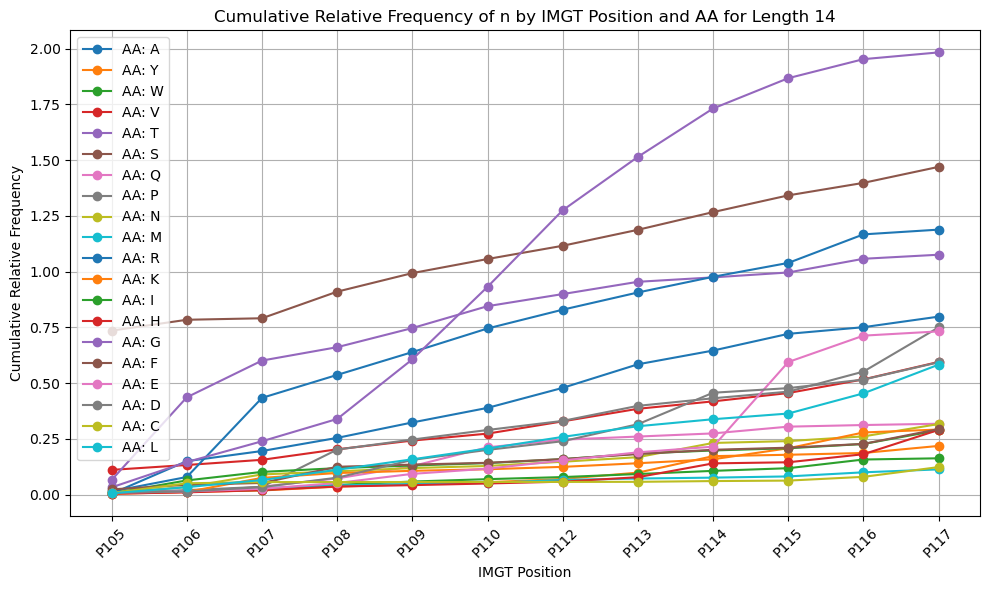

In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/lokalokes/deepTCR/main/1_DatasetCharacteristics/pivoted_cdr3_subset_34_patients.tsv"
df = pd.read_csv(url, delimiter='\t')

# Filter for length 15 for plotting
length_15_df = df[df['length'] == 14]

# Group by IMGT and AA, then sum the 'n' and 'total_per_length_position' columns
grouped_df = length_15_df.groupby(['IMGT', 'AA'])[['n', 'total_per_length_position']].sum().reset_index()

# Calculate the relative frequency
grouped_df['relative_freq'] = grouped_df['n'] / grouped_df['total_per_length_position']

# Sort by IMGT position to ensure cumulative sum is calculated correctly
grouped_df = grouped_df.sort_values(by=['IMGT'])

# Calculate the cumulative relative frequency for each amino acid
grouped_df['cumulative_relative_freq'] = grouped_df.groupby('AA')['relative_freq'].cumsum()

# Plot the cumulative relative frequency data
plt.figure(figsize=(10, 6))
for aa in grouped_df['AA'].unique():
    aa_data = grouped_df[grouped_df['AA'] == aa]
    plt.plot(aa_data['IMGT'], aa_data['cumulative_relative_freq'], marker='o', linestyle='-', label=f'AA: {aa}')

plt.title('Cumulative Relative Frequency of n by IMGT Position and AA for Length 14')
plt.xlabel('IMGT Position')
plt.ylabel('Cumulative Relative Frequency')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

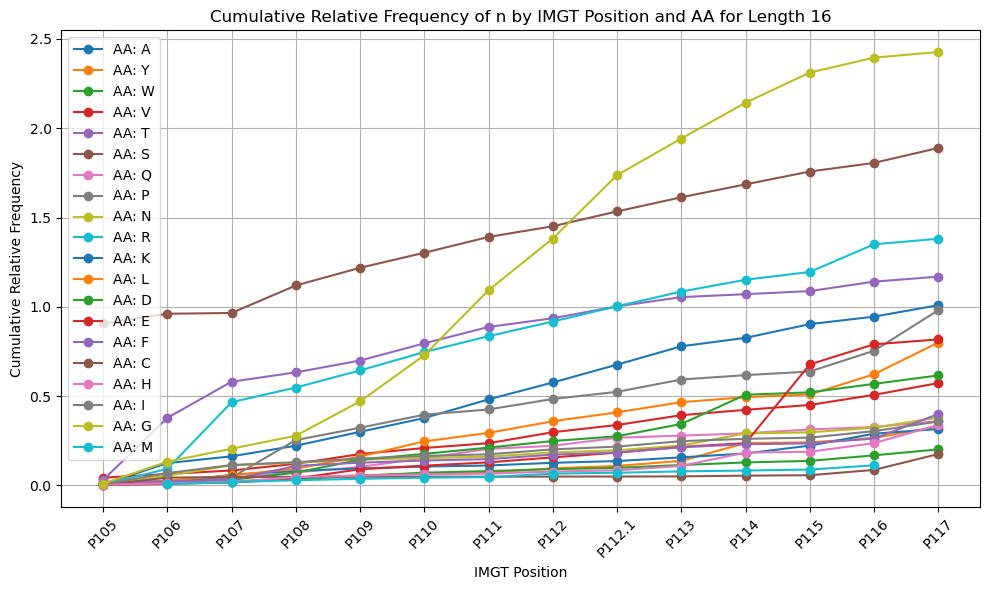

In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/lokalokes/deepTCR/main/1_DatasetCharacteristics/pivoted_cdr3_subset_34_patients.tsv"
df = pd.read_csv(url, delimiter='\t')

# Filter for length 15 for plotting
length_15_df = df[df['length'] == 16]

# Group by IMGT and AA, then sum the 'n' and 'total_per_length_position' columns
grouped_df = length_15_df.groupby(['IMGT', 'AA'])[['n', 'total_per_length_position']].sum().reset_index()

# Calculate the relative frequency
grouped_df['relative_freq'] = grouped_df['n'] / grouped_df['total_per_length_position']

# Sort by IMGT position to ensure cumulative sum is calculated correctly
grouped_df = grouped_df.sort_values(by=['IMGT'])

# Calculate the cumulative relative frequency for each amino acid
grouped_df['cumulative_relative_freq'] = grouped_df.groupby('AA')['relative_freq'].cumsum()

# Plot the cumulative relative frequency data
plt.figure(figsize=(10, 6))
for aa in grouped_df['AA'].unique():
    aa_data = grouped_df[grouped_df['AA'] == aa]
    plt.plot(aa_data['IMGT'], aa_data['cumulative_relative_freq'], marker='o', linestyle='-', label=f'AA: {aa}')

plt.title('Cumulative Relative Frequency of n by IMGT Position and AA for Length 16')
plt.xlabel('IMGT Position')
plt.ylabel('Cumulative Relative Frequency')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

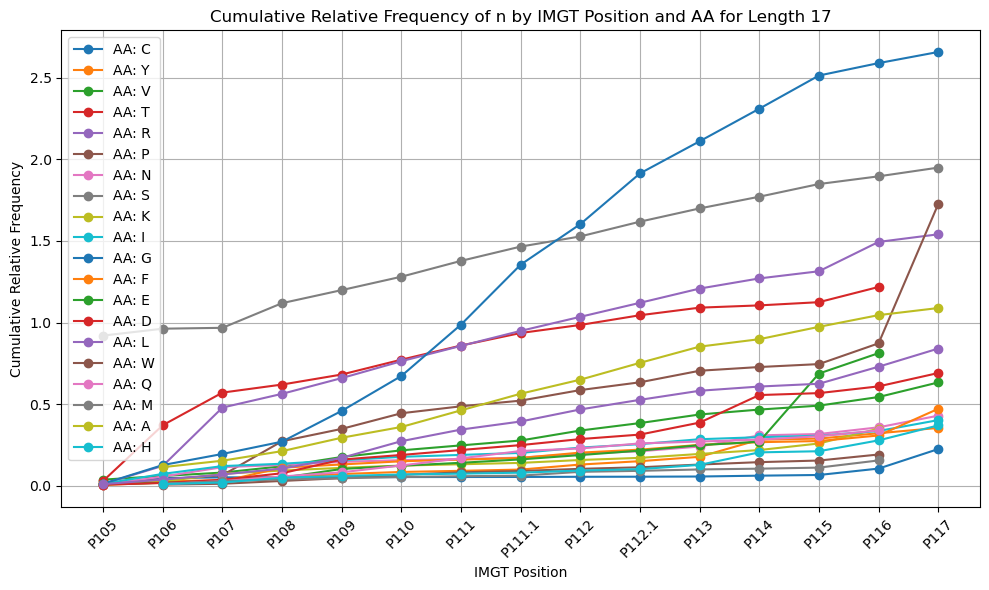

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/lokalokes/deepTCR/main/1_DatasetCharacteristics/pivoted_cdr3_subset_34_patients.tsv"
df = pd.read_csv(url, delimiter='\t')

# Filter for length 15 for plotting
length_15_df = df[df['length'] == 17]

# Group by IMGT and AA, then sum the 'n' and 'total_per_length_position' columns
grouped_df = length_15_df.groupby(['IMGT', 'AA'])[['n', 'total_per_length_position']].sum().reset_index()

# Calculate the relative frequency
grouped_df['relative_freq'] = grouped_df['n'] / grouped_df['total_per_length_position']

# Sort by IMGT position to ensure cumulative sum is calculated correctly
grouped_df = grouped_df.sort_values(by=['IMGT'])

# Calculate the cumulative relative frequency for each amino acid
grouped_df['cumulative_relative_freq'] = grouped_df.groupby('AA')['relative_freq'].cumsum()

# Plot the cumulative relative frequency data
plt.figure(figsize=(10, 6))
for aa in grouped_df['AA'].unique():
    aa_data = grouped_df[grouped_df['AA'] == aa]
    plt.plot(aa_data['IMGT'], aa_data['cumulative_relative_freq'], marker='o', linestyle='-', label=f'AA: {aa}')

plt.title('Cumulative Relative Frequency of n by IMGT Position and AA for Length 17')
plt.xlabel('IMGT Position')
plt.ylabel('Cumulative Relative Frequency')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

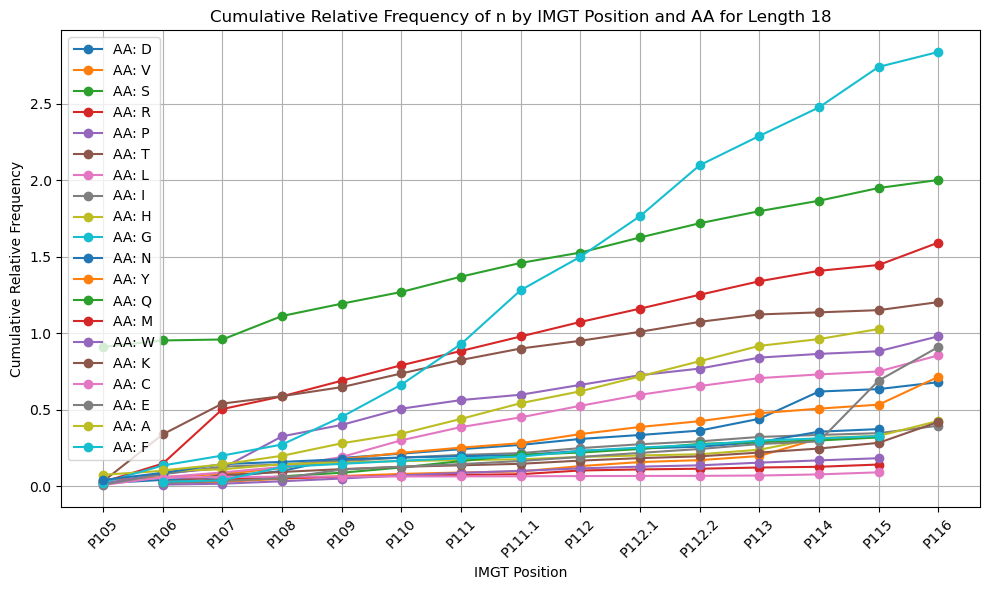

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/lokalokes/deepTCR/main/1_DatasetCharacteristics/pivoted_cdr3_subset_34_patients.tsv"
df = pd.read_csv(url, delimiter='\t')

# Filter for length 15 for plotting
length_15_df = df[df['length'] == 18]

# Group by IMGT and AA, then sum the 'n' and 'total_per_length_position' columns
grouped_df = length_15_df.groupby(['IMGT', 'AA'])[['n', 'total_per_length_position']].sum().reset_index()

# Calculate the relative frequency
grouped_df['relative_freq'] = grouped_df['n'] / grouped_df['total_per_length_position']

# Sort by IMGT position to ensure cumulative sum is calculated correctly
grouped_df = grouped_df.sort_values(by=['IMGT'])

# Calculate the cumulative relative frequency for each amino acid
grouped_df['cumulative_relative_freq'] = grouped_df.groupby('AA')['relative_freq'].cumsum()

# Plot the cumulative relative frequency data
plt.figure(figsize=(10, 6))
for aa in grouped_df['AA'].unique():
    aa_data = grouped_df[grouped_df['AA'] == aa]
    plt.plot(aa_data['IMGT'], aa_data['cumulative_relative_freq'], marker='o', linestyle='-', label=f'AA: {aa}')

plt.title('Cumulative Relative Frequency of n by IMGT Position and AA for Length 18')
plt.xlabel('IMGT Position')
plt.ylabel('Cumulative Relative Frequency')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()